In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

In [44]:
# Original data
data = {'text': ['I love the sunshine', 'Feeling down today', 'This is a happy moment', 'I am sad', 'Great news!', 'Feeling blue'],
        'mood': ['cheerful', 'sad', 'cheerful', 'sad', 'cheerful', 'sad'],
        'gender': ['female', 'male', 'female', 'male', 'female', 'male']}
df = pd.DataFrame(data)


In [45]:
# Label Encoding for 'mood' and 'gender'
label_encoder = LabelEncoder()
df['mood_encoded'] = label_encoder.fit_transform(df['mood'])
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

df

,text,mood,gender,mood_encoded,gender_encoded
0,I love the sunshine,cheerful,female,0,0
1,Feeling down today,sad,male,1,1
2,This is a happy moment,cheerful,female,0,0
3,I am sad,sad,male,1,1
4,Great news!,cheerful,female,0,0
5,Feeling blue,sad,male,1,1


In [50]:
# Split the data into training and testing sets
train_texts, test_texts, train_moods, test_moods, train_genders, test_genders = train_test_split(
    df['text'].values, df['mood_encoded'].values, df['gender_encoded'].values, test_size=0.2, random_state=42
)

print(
    f'x_train shape: {np.shape(train_texts)}\n'
    f'y_train shape: {np.shape(train_moods)}\n'
    f'x_test shape: {np.shape(train_genders)}\n'
    
    f'x_train shape: {np.shape(test_texts)}\n'
    f'y_train shape: {np.shape(test_moods)}\n'
    f'x_test shape: {np.shape(test_genders)}\n'
)

x_train shape: (4,)
y_train shape: (4,)
x_test shape: (4,)
x_train shape: (2,)
y_train shape: (2,)
x_test shape: (2,)



In [53]:
# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_sequences

[[2, 3], [4, 5, 6, 7, 8], [9, 10], [11, 12, 13]]

In [55]:
# Pad sequences to have consistent length
max_sequence_length = max(len(seq) for seq in train_sequences + test_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

train_data

array([[ 0,  0,  0,  2,  3],
       [ 4,  5,  6,  7,  8],
       [ 0,  0,  0,  9, 10],
       [ 0,  0, 11, 12, 13]])

Epoch 1/100
34/34 [==============================] - 9s 60ms/step - loss: 0.6938 - accuracy: 0.4627 - val_loss: 0.6930 - val_accuracy: 0.5294
Epoch 2/100
34/34 [==============================] - 0s 14ms/step - loss: 0.6937 - accuracy: 0.4925 - val_loss: 0.6930 - val_accuracy: 0.5294
Epoch 3/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.4118
Epoch 4/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6936 - accuracy: 0.4776 - val_loss: 0.6931 - val_accuracy: 0.5294
Epoch 5/100
34/34 [==============================] - 0s 14ms/step - loss: 0.6908 - accuracy: 0.5224 - val_loss: 0.6976 - val_accuracy: 0.4706
Epoch 6/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6821 - accuracy: 0.5970 - val_loss: 0.7137 - val_accuracy: 0.4706
Epoch 7/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6804 - accuracy: 0.6567 - val_loss: 0.7667 - val_accuracy: 0.4706
Epoch 

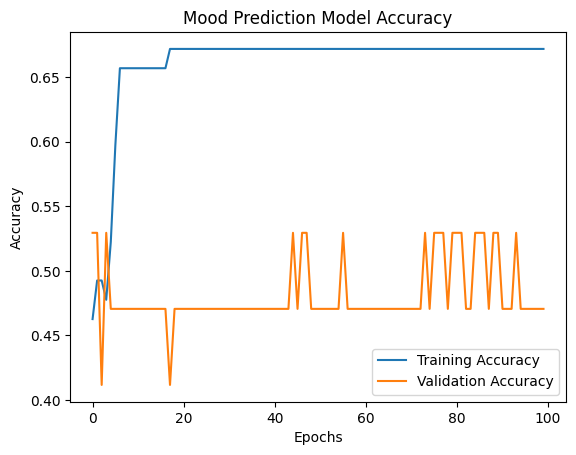

1/1 [==============================] - 0s 63ms/step - loss: 0.7585 - accuracy: 0.4545
Test Accuracy for mood prediction: 45.45%
Epoch 1/100
34/34 [==============================] - 7s 50ms/step - loss: 0.6892 - accuracy: 0.6119 - val_loss: 0.6864 - val_accuracy: 0.5882
Epoch 2/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6873 - accuracy: 0.6119 - val_loss: 0.6785 - val_accuracy: 0.5882
Epoch 3/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6760 - accuracy: 0.6119 - val_loss: 0.6779 - val_accuracy: 0.5882
Epoch 4/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6736 - accuracy: 0.6119 - val_loss: 0.6782 - val_accuracy: 0.5882
Epoch 5/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6753 - accuracy: 0.6119 - val_loss: 0.6777 - val_accuracy: 0.5882
Epoch 6/100
34/34 [==============================] - 0s 13ms/step - loss: 0.6696 - accuracy: 0.6119 - val_loss: 0.6789 - val_accuracy: 0.5882
Epoch 7/100
34/34 [=

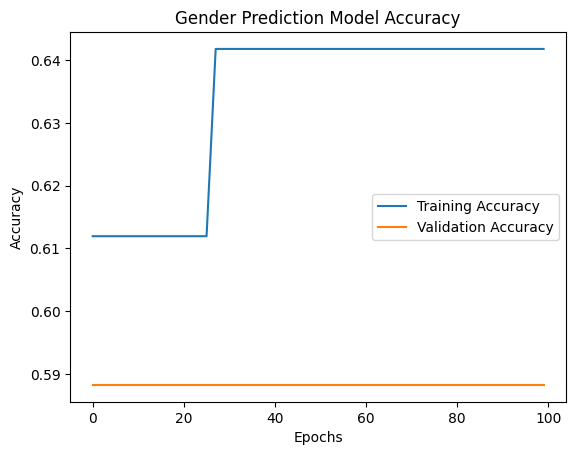

1/1 [==============================] - 0s 65ms/step - loss: 0.7878 - accuracy: 0.4091
Test Accuracy for gender prediction: 40.91%


In [30]:


# Build the LSTM model for mood prediction
embedding_dim = 16
model_mood = Sequential()
model_mood.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model_mood.add(LSTM(32, return_sequences=True))
model_mood.add(LSTM(32))
model_mood.add(Dense(64, activation='relu'))
model_mood.add(Dense(32, activation='relu'))
model_mood.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the mood model
model_mood.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the mood model
history_mood = model_mood.fit(train_data, train_moods, epochs=100, batch_size=2, validation_split=0.2)

# Plot accuracy for mood prediction
plt.plot(history_mood.history['accuracy'], label='Training Accuracy')
plt.plot(history_mood.history['val_accuracy'], label='Validation Accuracy')
plt.title('Mood Prediction Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the mood model on test data
loss_mood, accuracy_mood = model_mood.evaluate(test_data, test_moods)
print(f'Test Accuracy for mood prediction: {accuracy_mood * 100:.2f}%')

# Repeat the process for gender prediction
model_gender = Sequential()
model_gender.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model_gender.add(LSTM(32, return_sequences=True))
model_gender.add(LSTM(32))
model_gender.add(Dense(64, activation='relu'))
model_gender.add(Dense(32, activation='relu'))
model_gender.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the gender model
model_gender.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the gender model
history_gender = model_gender.fit(train_data, train_genders, epochs=100, batch_size=2, validation_split=0.2)

# Plot accuracy for gender prediction
plt.plot(history_gender.history['accuracy'], label='Training Accuracy')
plt.plot(history_gender.history['val_accuracy'], label='Validation Accuracy')
plt.title('Gender Prediction Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the gender model on test data
loss_gender, accuracy_gender = model_gender.evaluate(test_data, test_genders)
print(f'Test Accuracy for gender prediction: {accuracy_gender * 100:.2f}%')

In [59]:
# Assume models (model_mood and model_gender) are already trained

# Function to preprocess user input and make predictions
def predict_mood_and_gender(user_input, tokenizer, max_sequence_length, model_mood, model_gender):
    # Tokenize and pad the user input
    input_sequence = tokenizer.texts_to_sequences([user_input])
    padded_input = pad_sequences(input_sequence, maxlen=max_sequence_length)

    # Predict mood
    mood_prediction = model_mood.predict(padded_input)[0, 0]
    predicted_mood = "cheerful" if mood_prediction >= 0.5 else "sad"

    # Predict gender
    gender_prediction = model_gender.predict(padded_input)[0, 0]
    predicted_gender = "female" if gender_prediction >= 0.5 else "male"

    return predicted_mood, predicted_gender

# Example usage
user_input = input("Enter a text: ")
predicted_mood, predicted_gender = predict_mood_and_gender(user_input, tokenizer, max_sequence_length, model_mood, model_gender)

print(f"Predicted Mood: {predicted_mood}")
print(f"Predicted Gender: {predicted_gender}")


1/1 [==============================] - 0s 37ms/step
Predicted Mood: sad
Predicted Gender: male


# RANDOM CODE

In [71]:
df.sample(frac=1)

,text,mood,gender,mood_encoded,gender_encoded
3,I am sad,sad,male,1,1
1,Feeling down today,sad,male,1,1
0,I love the sunshine,cheerful,female,0,0
2,This is a happy moment,cheerful,female,0,0
5,Feeling blue,sad,male,1,1
4,Great news!,cheerful,female,0,0
